In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

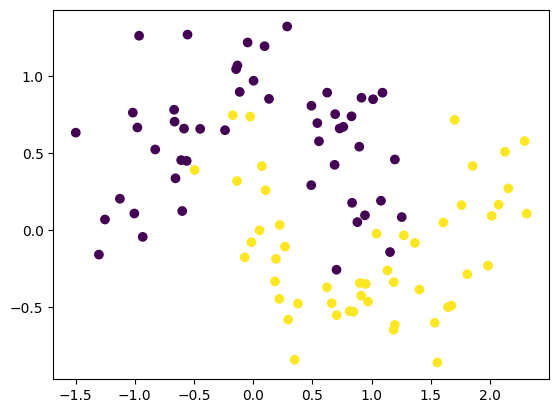

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 17s 2ms/step


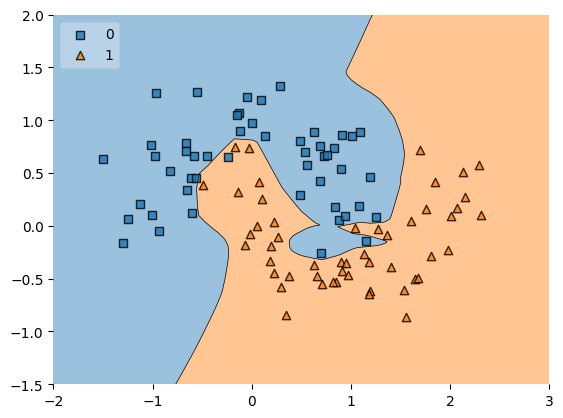

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

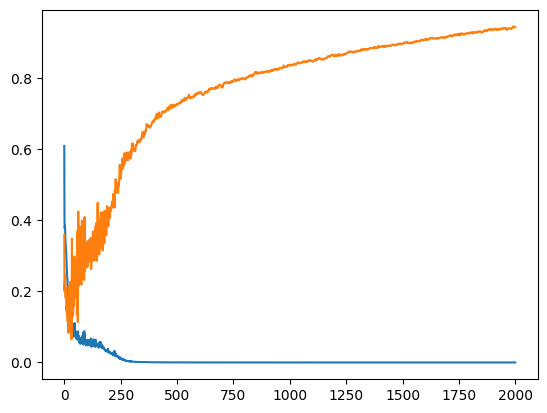

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [11]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.002)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.002)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 21s 2ms/step


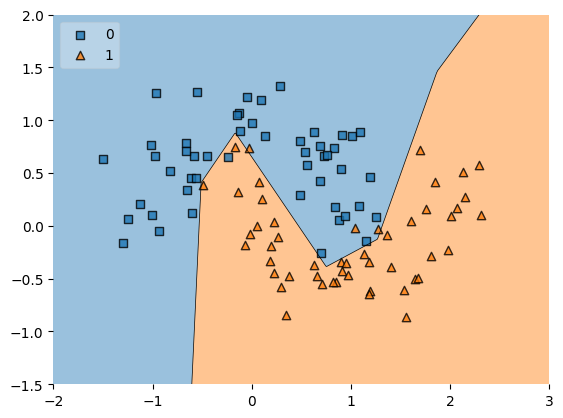

In [13]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

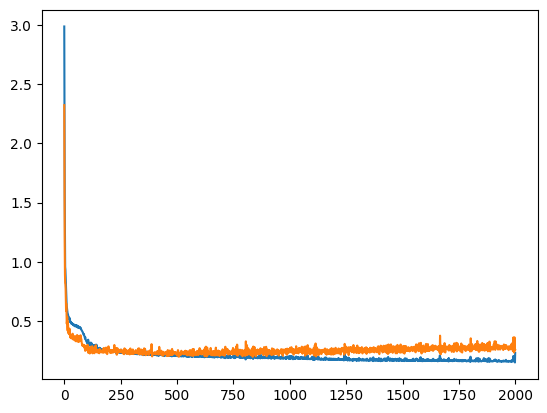

In [14]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [15]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

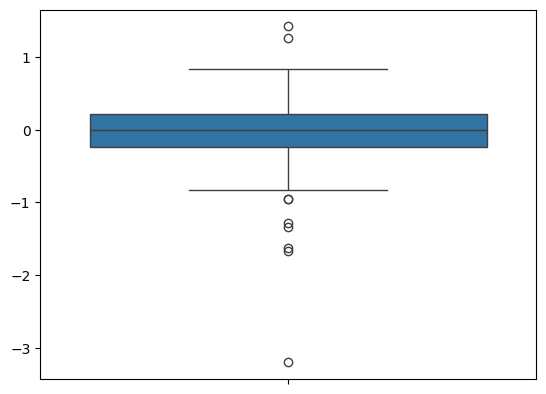

In [16]:
sns.boxplot(model1_weight_layer1)

<Axes: >

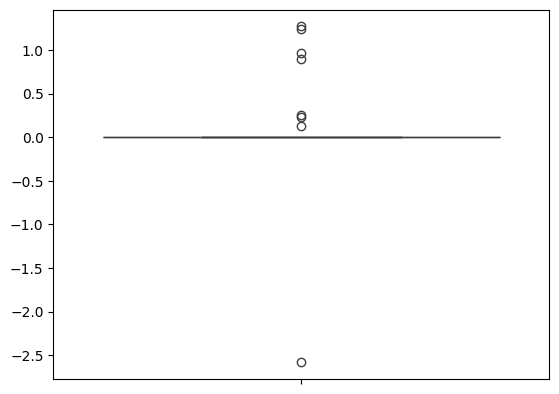

In [17]:
sns.boxplot(model2_weight_layer1)

In [18]:
model1_weight_layer1.min()

-3.1930149

In [19]:
model2_weight_layer1.min()

-2.5826159

<ipython-input-20-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-20-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

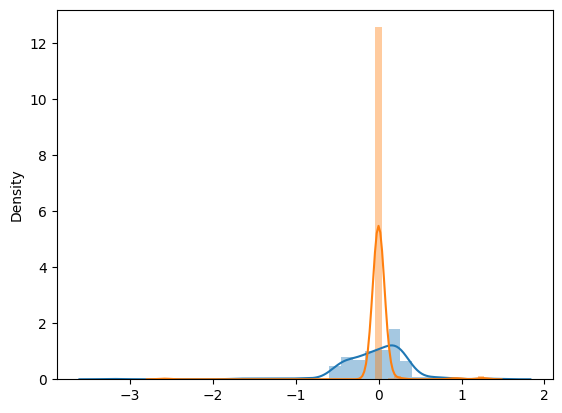

In [20]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [21]:
model1.get_weights()[0].reshape(256)

array([-4.98110801e-02, -1.24056833e-02,  1.87319189e-01, -3.58430028e-01,
       -7.80337602e-02,  1.80143952e-01, -4.56093609e-01, -2.16271877e-01,
       -4.80988353e-01,  2.17813179e-01, -4.82106090e-01, -1.48848459e-01,
        4.21230532e-02, -4.25852537e-01,  2.00312585e-01, -1.23217598e-01,
       -5.36048770e-01, -2.38496304e-01, -4.64048833e-01, -1.68512743e-02,
        3.41660902e-02,  1.40133262e-01, -1.68727905e-01, -2.62050688e-01,
       -4.99462634e-01, -4.80720967e-01, -3.76275592e-02,  2.39172444e-01,
        7.88063258e-02,  2.45655105e-01,  6.51750565e-02,  4.82716709e-02,
        1.27996027e-01,  2.44266912e-01, -4.05970454e-01, -3.83258343e-01,
       -1.38610676e-01, -1.52978180e-02,  7.79545531e-02,  1.91760466e-01,
        2.33318761e-01,  2.67060101e-01,  3.89185756e-01,  2.43899345e-01,
       -1.83042690e-01, -1.93703130e-01, -4.47617888e-01,  2.22596619e-02,
        2.49634758e-01, -4.08235371e-01,  2.70543963e-01, -1.58995852e-01,
       -2.13164359e-01, -

In [26]:
model3 = Sequential()

model3.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model3.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
adam = Adam(learning_rate=0.01)
model3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history3 = model3.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 18s 2ms/step


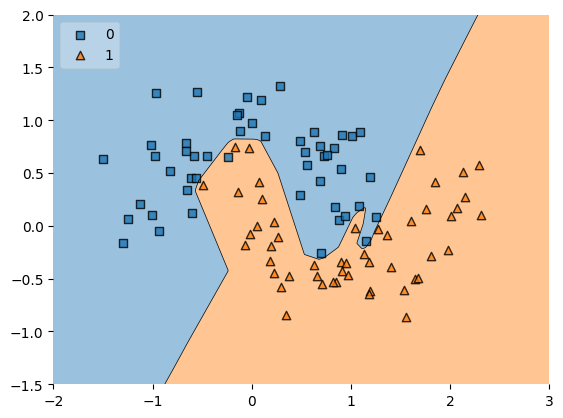

In [28]:
plot_decision_regions(X, y.astype('int'), clf=model3, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

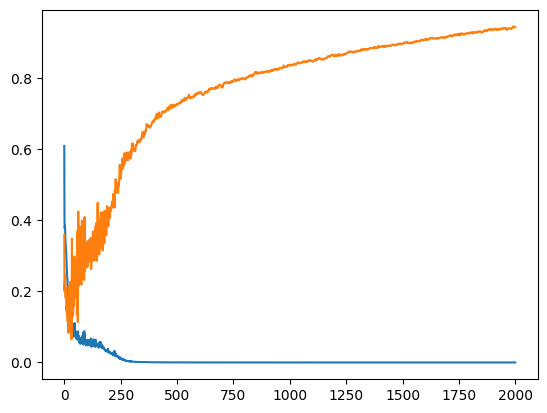

In [29]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

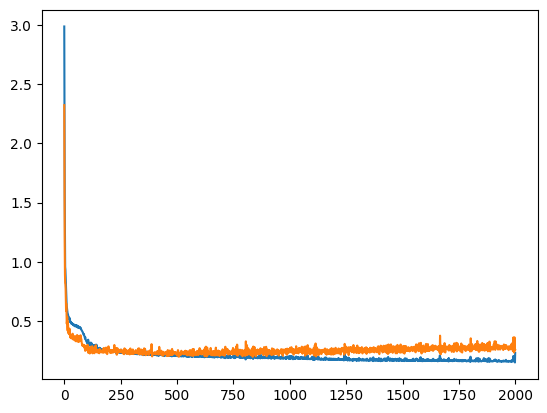

In [30]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

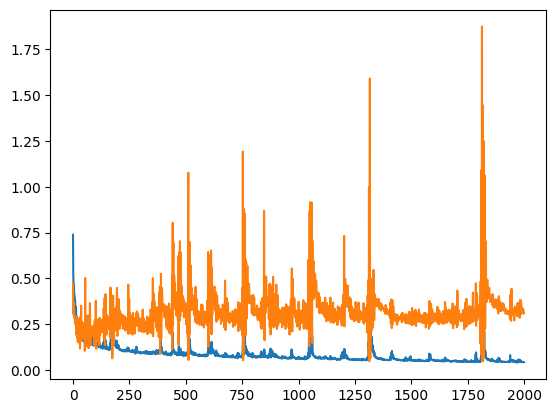

In [31]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [34]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)
model3_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

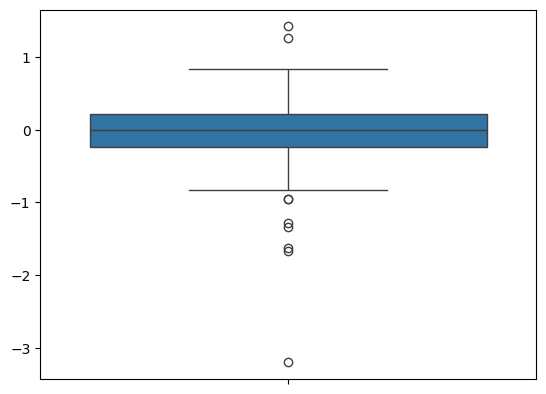

In [35]:
sns.boxplot(model1_weight_layer1)

<Axes: >

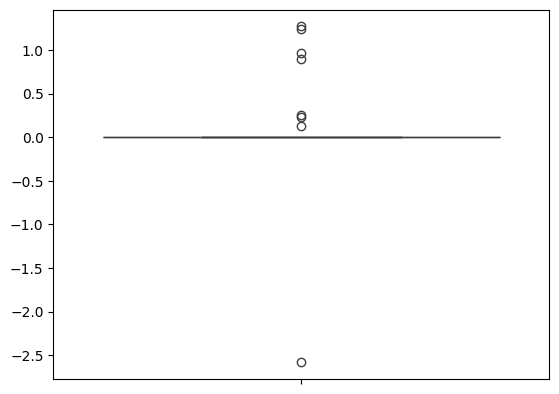

In [36]:
sns.boxplot(model2_weight_layer1)

<Axes: >

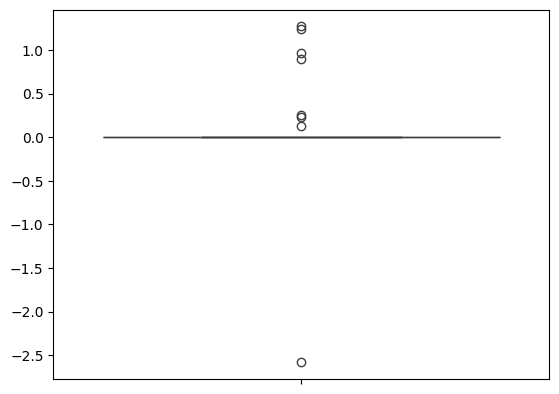

In [37]:
sns.boxplot(model3_weight_layer1)

In [38]:
model1_weight_layer1.min()

-3.1930149

In [39]:
model2_weight_layer1.min()

-2.5826159

In [40]:
model3_weight_layer1.min()

-2.5826159

<ipython-input-41-921e5a1cf677>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-41-921e5a1cf677>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)
<ipython-input-41-921e5a1cf677>:3: UserWarning: 

`distplot` is a deprecated function and 

<Axes: ylabel='Density'>

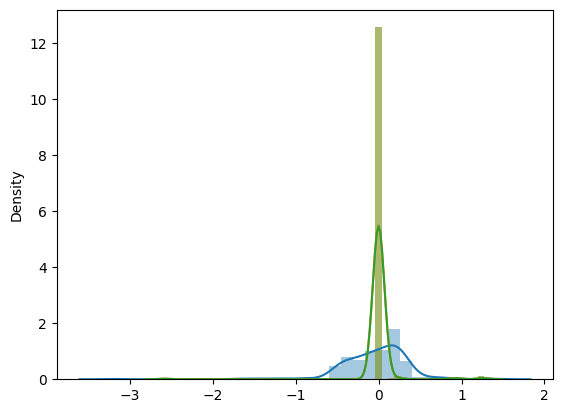

In [41]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)
sns.distplot(model3_weight_layer1)

In [42]:
model1.get_weights()[0].reshape(256)

array([-4.98110801e-02, -1.24056833e-02,  1.87319189e-01, -3.58430028e-01,
       -7.80337602e-02,  1.80143952e-01, -4.56093609e-01, -2.16271877e-01,
       -4.80988353e-01,  2.17813179e-01, -4.82106090e-01, -1.48848459e-01,
        4.21230532e-02, -4.25852537e-01,  2.00312585e-01, -1.23217598e-01,
       -5.36048770e-01, -2.38496304e-01, -4.64048833e-01, -1.68512743e-02,
        3.41660902e-02,  1.40133262e-01, -1.68727905e-01, -2.62050688e-01,
       -4.99462634e-01, -4.80720967e-01, -3.76275592e-02,  2.39172444e-01,
        7.88063258e-02,  2.45655105e-01,  6.51750565e-02,  4.82716709e-02,
        1.27996027e-01,  2.44266912e-01, -4.05970454e-01, -3.83258343e-01,
       -1.38610676e-01, -1.52978180e-02,  7.79545531e-02,  1.91760466e-01,
        2.33318761e-01,  2.67060101e-01,  3.89185756e-01,  2.43899345e-01,
       -1.83042690e-01, -1.93703130e-01, -4.47617888e-01,  2.22596619e-02,
        2.49634758e-01, -4.08235371e-01,  2.70543963e-01, -1.58995852e-01,
       -2.13164359e-01, -

In [43]:
model2.get_weights()[0].reshape(256)

array([ 2.05064937e-03, -1.14114373e-03, -2.38618255e-03,  1.75879989e-03,
        7.77024485e-04, -1.24810671e-04, -8.37796018e-04, -3.92316026e-04,
       -1.18293345e-03,  3.84984771e-04, -8.29438097e-04, -3.53379291e-04,
        1.27030444e+00, -1.18446175e-03, -1.52193825e-05,  4.87621292e-04,
        1.75082218e-03,  1.29730091e-03, -2.47048261e-03, -1.09715643e-03,
        4.44564968e-04,  9.66473043e-01,  1.46638986e-03,  4.91413593e-05,
       -3.91117483e-03,  7.26865779e-04,  1.70255511e-03, -3.67600878e-05,
        1.71376532e-03,  1.38233975e-03,  1.42591074e-03, -1.10903964e-03,
        7.82461371e-04,  1.60069438e-03,  2.24540563e-05, -1.06869906e-03,
        3.42209503e-04,  1.95658387e-04,  1.07062364e-03, -5.54056722e-04,
       -2.98717944e-03, -1.09467877e-03,  1.38639472e-04, -2.93593155e-03,
       -5.00413153e-05,  9.15497541e-04,  3.91501002e-04, -1.87233603e-03,
       -2.43866205e-04, -1.11300393e-03, -2.55097845e-03, -1.00476458e-03,
       -1.12369948e-04, -

In [44]:
model3.get_weights()[0].reshape(256)

array([-2.49859750e-34, -3.80545180e-06,  4.29672894e-34, -2.27113649e-20,
        1.43449917e-03,  9.12358161e-15, -2.05710937e-34,  5.65310114e-13,
       -2.44240543e-34, -2.87389047e-02,  2.97699270e-08, -8.14369121e-14,
       -4.52011496e-01,  1.36389881e-05, -1.33340836e-01,  3.36230005e-05,
       -3.72808148e-34, -6.07168313e-29,  6.59909427e-01, -6.34628415e-01,
        1.81127060e-02, -6.16628408e-01,  5.92271183e-32,  5.79186592e-34,
        1.51288671e-34, -2.86538512e-01,  9.65119089e-35,  2.88029319e-16,
        5.69602787e-01, -3.99621902e-03,  6.98004425e-01, -6.10709394e-05,
        7.09709466e-01, -6.13579929e-01,  7.92677328e-03, -2.96204761e-02,
        3.63059328e-34, -5.20092385e-07,  3.12560350e-01, -1.32303778e-03,
       -1.27013458e-08, -7.58960247e-01, -4.58608031e-01, -4.31972427e-12,
        6.77677453e-01,  2.65661149e-34, -1.04305299e-34,  6.76395954e-04,
       -2.15604388e-07, -6.85839099e-04, -5.94808459e-01, -3.08005969e-34,
       -1.38594263e-30,  